In [1]:
#from sympy import symbols, cos, sin, Matrix, pi, sqrt, eye, zeros, simplify
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Defining homogeneous matrix for constant-curvature model [SSRR2024]

In [2]:
# Defining variables
theta = sp.symbols('theta')
phi = sp.symbols('phi')
L = sp.symbols('L')
# x, y, z = symbols('x y z')

# Defining matrices
T = sp.Matrix([
            [sp.cos(phi) * sp.cos(theta), -sp.sin(phi), sp.cos(phi) * sp.sin(theta), L / theta * sp.cos(phi) * (1 -sp.cos(theta))], 
            [sp.sin(phi) * sp.cos(theta),  sp.cos(phi), sp.sin(phi) * sp.sin(theta), L / theta * sp.sin(phi) * (1 -sp.cos(theta))], 
            [-sp.sin(theta), 0, sp.cos(theta), L / theta * sp.sin(theta)], 
            [0, 0, 0, 1]
            ])


T_supp = sp.Matrix([
            [sp.cos(phi)**2 * (sp.cos(theta)-1) +1, sp.sin(phi) * sp.cos(phi) * (sp.cos(theta)-1), sp.cos(phi) * sp.sin(theta), L / theta * sp.cos(phi) * (1 -sp.cos(theta))], 
            [sp.sin(phi)* sp.cos(phi) * (sp.cos(theta)-1), sp.cos(phi)**2 *(1 -sp.cos(theta)) + sp.cos(theta), sp.sin(phi) * sp.sin(theta), L / theta * sp.sin(phi) * (1 -sp.cos(theta))], 
            [-sp.cos(phi) * sp.sin(theta), -sp.sin(phi) * sp.sin(theta), sp.cos(theta), L / theta * sp.sin(theta)], 
            [0, 0, 0, 1]
            ])
display(T)

Matrix([
[cos(phi)*cos(theta), -sin(phi), sin(theta)*cos(phi), L*(1 - cos(theta))*cos(phi)/theta],
[sin(phi)*cos(theta),  cos(phi), sin(phi)*sin(theta), L*(1 - cos(theta))*sin(phi)/theta],
[        -sin(theta),         0,          cos(theta),                L*sin(theta)/theta],
[                  0,         0,                   0,                                 1]])

## Substitution example

In [3]:
# 例1: theta に pi/4 を代入
T_theta_sub = T.subs(theta, sp.pi/4)
display(T_theta_sub)

# 例2: phi に pi/3 を代入
T_phi_sub = T.subs(phi, sp.pi/3)
display(T_phi_sub)

# 例3: theta に pi/4、phi に pi/3 を代入
T_both_sub = T.subs({theta: sp.pi/4, phi: sp.pi/3})
display(T_both_sub)

# 例4: 具体的な数値に評価 (L = 1 とする場合)
T_numeric = T_both_sub.subs(L, 1).evalf()
display(T_numeric)

Matrix([
[sqrt(2)*cos(phi)/2, -sin(phi), sqrt(2)*cos(phi)/2, 4*L*(1 - sqrt(2)/2)*cos(phi)/pi],
[sqrt(2)*sin(phi)/2,  cos(phi), sqrt(2)*sin(phi)/2, 4*L*(1 - sqrt(2)/2)*sin(phi)/pi],
[        -sqrt(2)/2,         0,          sqrt(2)/2,                  2*sqrt(2)*L/pi],
[                 0,         0,                  0,                               1]])

Matrix([
[        cos(theta)/2, -sqrt(3)/2,         sin(theta)/2,         L*(1 - cos(theta))/(2*theta)],
[sqrt(3)*cos(theta)/2,        1/2, sqrt(3)*sin(theta)/2, sqrt(3)*L*(1 - cos(theta))/(2*theta)],
[         -sin(theta),          0,           cos(theta),                   L*sin(theta)/theta],
[                   0,          0,                    0,                                    1]])

Matrix([
[ sqrt(2)/4, -sqrt(3)/2, sqrt(2)/4,         2*L*(1 - sqrt(2)/2)/pi],
[ sqrt(6)/4,        1/2, sqrt(6)/4, 2*sqrt(3)*L*(1 - sqrt(2)/2)/pi],
[-sqrt(2)/2,          0, sqrt(2)/2,                 2*sqrt(2)*L/pi],
[         0,          0,         0,                              1]])

Matrix([
[ 0.353553390593274, -0.866025403784439, 0.353553390593274, 0.186461614289028],
[ 0.612372435695794,                0.5, 0.612372435695794, 0.322960989609908],
[-0.707106781186548,                  0, 0.707106781186548, 0.900316316157106],
[                 0,                  0,                 0,               1.0]])

## Additional sample

In [4]:
T_phi_sub = T.subs(phi, 0)
display(T_phi_sub)

# 例2: theta に 0.01、phi に pi/3 を代入
T_both_sub = T.subs({theta: 0.001, phi: 0})
display(T_both_sub)

# 例3: theta に pi/4、phi に pi/3 を代入
T_both_sub = T.subs({theta: sp.pi, phi: 0})
display(T_both_sub)

# 例4: 具体的な数値に評価 (L = 1 とする場合)
T_numeric = T_both_sub.subs(L, 1).evalf()
display(T_numeric)

Matrix([
[ cos(theta), 0, sin(theta), L*(1 - cos(theta))/theta],
[          0, 1,          0,                        0],
[-sin(theta), 0, cos(theta),       L*sin(theta)/theta],
[          0, 0,          0,                        1]])

Matrix([
[    0.999999500000042, 0, 0.000999999833333342, 0.000499999958325503*L],
[                    0, 1,                    0,                      0],
[-0.000999999833333342, 0,    0.999999500000042,    0.999999833333342*L],
[                    0, 0,                    0,                      1]])

Matrix([
[-1, 0,  0, 2*L/pi],
[ 0, 1,  0,      0],
[ 0, 0, -1,      0],
[ 0, 0,  0,      1]])

Matrix([
[-1.0,   0,    0, 0.636619772367581],
[   0, 1.0,    0,                 0],
[   0,   0, -1.0,                 0],
[   0,   0,    0,               1.0]])

## Ligament attachment

In [5]:
i = sp.symbols('i')
a = sp.symbols('a')
pv_l = sp.Matrix([a * sp.cos(sp.pi/2*i +sp.pi/4), a * sp.sin(sp.pi/2*i +sp.pi/4), 0])
display(pv_l)

pv_l_ilist = []
for i_num in range(4):
    pv_l_i = pv_l.subs({i: i_num})
    pv_l_ilist.append(pv_l_i)
display(pv_l_i)


pv_h_hg = T * pv_l.col_join(sp.Matrix([1]))
pv_h = sp.Matrix(pv_h_hg[:-1])

pv_h_ilist = []
for i_num in range(4):
    pv_h_i = pv_h.subs({i: i_num})
    pv_h_ilist.append(pv_h_i)
display(pv_h_i)


ligament_list = []
for i_num in range(4):
    ligament = pv_h_ilist[i_num] - pv_l_ilist[i_num]
    ligament_list.append(ligament)

ligament_list.append(pv_h_ilist[1] - pv_l_ilist[0])
ligament_list.append(pv_h_ilist[0] - pv_l_ilist[1])
ligament_list.append(pv_h_ilist[3] - pv_l_ilist[2])
ligament_list.append(pv_h_ilist[2] - pv_l_ilist[3])


#display(p_parallel_list[3])
#norm = sp.sqrt(sum(comp**2 for comp in p_parallel_list[0]))
norm_list = []
for i_num in range(len(ligament_list)):
    norm = ligament_list[i_num].norm()
    norm_list.append(norm)
display(norm)



Matrix([
[a*cos(pi*i/2 + pi/4)],
[a*sin(pi*i/2 + pi/4)],
[                   0]])

Matrix([
[ sqrt(2)*a/2],
[-sqrt(2)*a/2],
[           0]])

Matrix([
[L*(1 - cos(theta))*cos(phi)/theta + sqrt(2)*a*sin(phi)/2 + sqrt(2)*a*cos(phi)*cos(theta)/2],
[L*(1 - cos(theta))*sin(phi)/theta + sqrt(2)*a*sin(phi)*cos(theta)/2 - sqrt(2)*a*cos(phi)/2],
[                                               L*sin(theta)/theta - sqrt(2)*a*sin(theta)/2]])

sqrt(Abs(L*sin(theta)/theta + sqrt(2)*a*sin(theta)/2)**2 + Abs(L*(cos(theta) - 1)*sin(phi)/theta + sqrt(2)*a*sin(phi)*cos(theta)/2 + sqrt(2)*a*cos(phi)/2 - sqrt(2)*a/2)**2 + Abs(L*(cos(theta) - 1)*cos(phi)/theta - sqrt(2)*a*sin(phi)/2 + sqrt(2)*a*cos(phi)*cos(theta)/2 + sqrt(2)*a/2)**2)

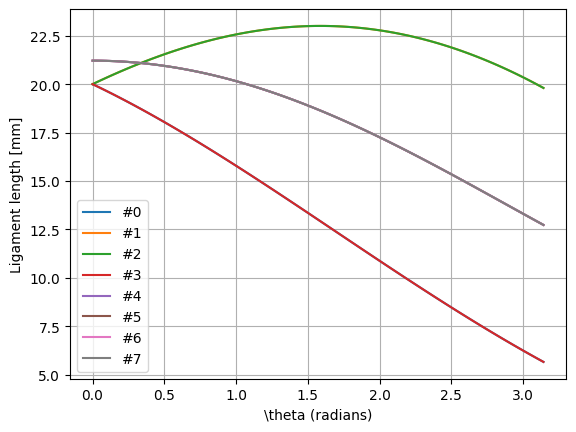

In [11]:
# theta の値を指定してノルムを計算
theta_vals = np.linspace(0.0001, 1.0 *np.pi, 100)

norm_vals_list = []
for i_num in range(len(ligament_list)):
    norm_vals = [norm_list[i_num].subs({L: 20, a: 5, theta: val, phi: 0.0}).evalf() for val in theta_vals]
    norm_vals_list.append(norm_vals)
    #pv_l_i = pv_l.subs({L: 20, a: 5, i: i_num})

# グラフのプロット
for i_num in range(len(ligament_list)):
    plt.plot(theta_vals, norm_vals_list[i_num], label=f'#{i_num}')
#plt.title('Norm of the vector y as a function of theta')
plt.xlabel('Theta (radians)')
plt.ylabel('Ligament length [mm]')
plt.grid()
plt.legend()
plt.show()


In [7]:
M1 = sp.eye(3)
M2 = sp.zeros(3, 4)
M1.row_join(M2)

Matrix([
[1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0]])

## col_join example

In [8]:
pv_sample = sp.Matrix([a * sp.cos(sp.pi/2*i +sp.pi/4), a * sp.sin(sp.pi/2*i +sp.pi/4), 0])
display(pv_sample)
pv_hg_sample = pv_sample.col_join(sp.Matrix([1]))
display(pv_hg_sample)

Matrix([
[a*cos(pi*i/2 + pi/4)],
[a*sin(pi*i/2 + pi/4)],
[                   0]])

Matrix([
[a*cos(pi*i/2 + pi/4)],
[a*sin(pi*i/2 + pi/4)],
[                   0],
[                   1]])